In [1]:
# Import the requests library
import requests
# import the API key
from config import weather_api_key

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [4]:
# import the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [5]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(-90.000,90.000,size=1500)
lngs = np.random.uniform(-180.000,180.000,size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes into a list 
coordinates = list(lat_lngs)

In [7]:
from citipy import citipy

In [8]:
# Create a list for holding the cities 
cities = []
# Identify the nearest city for each longitude and latitude combination
for coordinate in coordinates: 
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    # If the city is unique, then we will add it to the cities list
    if city not in cities: 
        cities.append(city)
# print the city length to confirm sufficient count
len(cities)

615

In [9]:
# Create an empty list to hold the weather data 
city_data = []
# Print the beginning of the logging 
print("Beginning Data Retrieval   ")
print("---------------------------")

# create counters 
record_count = 1
set_count = 1

# Loop through all of the cities in our list 
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes 
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL for each city 
    city_url = url + "&q=" + city.replace(" ", "+")

     # Log the URL, record, and set numbers and the city
    print(f'Processing Record {record_count} of Set {set_count} | {city}')

    # Add 1 to the record count 
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval   
---------------------------
Processing Record 1 of Set 1 | georgetown
Processing Record 2 of Set 1 | ancud
Processing Record 3 of Set 1 | amderma
City not found. Skipping...
Processing Record 4 of Set 1 | kamenskoye
City not found. Skipping...
Processing Record 5 of Set 1 | kayerkan
Processing Record 6 of Set 1 | hithadhoo
Processing Record 7 of Set 1 | meyungs
City not found. Skipping...
Processing Record 8 of Set 1 | canberra
Processing Record 9 of Set 1 | hualmay
Processing Record 10 of Set 1 | adrar
Processing Record 11 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 12 of Set 1 | bar harbor
Processing Record 13 of Set 1 | mehamn
Processing Record 14 of Set 1 | bengkulu
Processing Record 15 of Set 1 | airai
Processing Record 16 of Set 1 | saint-pierre
Processing Record 17 of Set 1 | hilo
Processing Record 18 of Set 1 | arlit
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | butaritari
Processing Record 21 of Set 1

Processing Record 37 of Set 4 | kendari
Processing Record 38 of Set 4 | susanville
Processing Record 39 of Set 4 | denia
Processing Record 40 of Set 4 | iqaluit
Processing Record 41 of Set 4 | deputatskiy
Processing Record 42 of Set 4 | halalo
City not found. Skipping...
Processing Record 43 of Set 4 | margate
Processing Record 44 of Set 4 | rehoboth
Processing Record 45 of Set 4 | dingle
Processing Record 46 of Set 4 | malanje
Processing Record 47 of Set 4 | north bend
Processing Record 48 of Set 4 | longyearbyen
Processing Record 49 of Set 4 | pisco
Processing Record 50 of Set 4 | upernavik
Processing Record 1 of Set 5 | huarmey
Processing Record 2 of Set 5 | resita
Processing Record 3 of Set 5 | port blair
Processing Record 4 of Set 5 | pevek
Processing Record 5 of Set 5 | calvinia
Processing Record 6 of Set 5 | vostok
Processing Record 7 of Set 5 | fort nelson
Processing Record 8 of Set 5 | saldanha
Processing Record 9 of Set 5 | devanhalli
Processing Record 10 of Set 5 | pedernale

Processing Record 24 of Set 8 | twentynine palms
Processing Record 25 of Set 8 | taungdwingyi
Processing Record 26 of Set 8 | roebourne
Processing Record 27 of Set 8 | beyneu
Processing Record 28 of Set 8 | vieux fort
Processing Record 29 of Set 8 | zhanaozen
Processing Record 30 of Set 8 | ulukulevo
Processing Record 31 of Set 8 | laguna
Processing Record 32 of Set 8 | sorland
Processing Record 33 of Set 8 | general roca
Processing Record 34 of Set 8 | isla mujeres
Processing Record 35 of Set 8 | sabinas hidalgo
Processing Record 36 of Set 8 | tura
Processing Record 37 of Set 8 | ust-kulom
Processing Record 38 of Set 8 | peniche
Processing Record 39 of Set 8 | zhigansk
Processing Record 40 of Set 8 | at-bashi
Processing Record 41 of Set 8 | axim
Processing Record 42 of Set 8 | rio gallegos
Processing Record 43 of Set 8 | hingoli
Processing Record 44 of Set 8 | hovd
Processing Record 45 of Set 8 | takoradi
Processing Record 46 of Set 8 | talcahuano
Processing Record 47 of Set 8 | shayg

Processing Record 13 of Set 12 | harper
Processing Record 14 of Set 12 | bonnyville
Processing Record 15 of Set 12 | sao joao da barra
Processing Record 16 of Set 12 | general pico
Processing Record 17 of Set 12 | iralaya
Processing Record 18 of Set 12 | bistra
Processing Record 19 of Set 12 | lakes entrance
Processing Record 20 of Set 12 | vung tau
Processing Record 21 of Set 12 | nicoya
Processing Record 22 of Set 12 | tukrah
Processing Record 23 of Set 12 | russell
Processing Record 24 of Set 12 | emba
Processing Record 25 of Set 12 | biloela
Processing Record 26 of Set 12 | hobyo
Processing Record 27 of Set 12 | bodden town
Processing Record 28 of Set 12 | hay river
Processing Record 29 of Set 12 | assai
Processing Record 30 of Set 12 | chiscas
Processing Record 31 of Set 12 | houston
Processing Record 32 of Set 12 | malyn
Processing Record 33 of Set 12 | vilyuysk
Processing Record 34 of Set 12 | hun
Processing Record 35 of Set 12 | kalachinsk
Processing Record 36 of Set 12 | kings

In [10]:
len(city_data)

566

In [11]:
# Convert the array of dictionaries into a Pandas DataFrame 
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Georgetown,5.4112,100.3354,89.53,77,20,8.99,MY,2022-02-02 04:39:27
1,Ancud,-41.8697,-73.8203,58.23,93,100,2.86,CL,2022-02-02 04:41:34
2,Kayerkan,69.3497,87.7602,3.52,77,97,5.73,RU,2022-02-02 04:41:36
3,Hithadhoo,-0.6000,73.0833,82.80,70,8,9.91,MV,2022-02-02 04:41:38
4,Canberra,-35.2835,149.1281,74.05,74,100,16.11,AU,2022-02-02 04:41:41
5,Hualmay,-11.0964,-77.6139,70.29,82,71,8.75,PE,2022-02-02 04:36:57
6,Adrar,20.5022,-10.0711,65.59,21,40,11.45,MR,2022-02-02 04:41:43
7,Bar Harbor,44.3876,-68.2039,29.01,75,100,3.00,US,2022-02-02 04:40:01
8,Mehamn,71.0357,27.8492,21.38,85,0,14.97,NO,2022-02-02 04:41:46
9,Bengkulu,-3.8004,102.2655,78.69,72,100,5.93,ID,2022-02-02 04:37:21


In [12]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Georgetown,MY,2022-02-02 04:39:27,5.4112,100.3354,89.53,77,20,8.99
1,Ancud,CL,2022-02-02 04:41:34,-41.8697,-73.8203,58.23,93,100,2.86
2,Kayerkan,RU,2022-02-02 04:41:36,69.3497,87.7602,3.52,77,97,5.73
3,Hithadhoo,MV,2022-02-02 04:41:38,-0.6000,73.0833,82.80,70,8,9.91
4,Canberra,AU,2022-02-02 04:41:41,-35.2835,149.1281,74.05,74,100,16.11
5,Hualmay,PE,2022-02-02 04:36:57,-11.0964,-77.6139,70.29,82,71,8.75
6,Adrar,MR,2022-02-02 04:41:43,20.5022,-10.0711,65.59,21,40,11.45
7,Bar Harbor,US,2022-02-02 04:40:01,44.3876,-68.2039,29.01,75,100,3.00
8,Mehamn,NO,2022-02-02 04:41:46,71.0357,27.8492,21.38,85,0,14.97
9,Bengkulu,ID,2022-02-02 04:37:21,-3.8004,102.2655,78.69,72,100,5.93


In [13]:
# Create the output file, CSV
output_data_file = "weather_data/cities.csv"

#Export the city data into a CSV
city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [14]:
# Extract relevent feilds from the DataFrame for plotting 
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

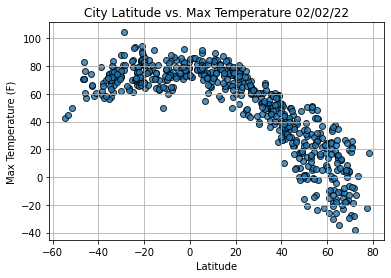

In [16]:
# Import the time module 
import time

# Build the scatter plot for the latitude vs. max temperature 
plt.scatter(lats,
           max_temps,
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=0.8,
           label="Cities")
# Incorperate the other graph properties 
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")
# Show plot 
plt.show()

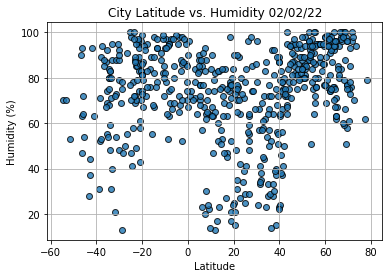

In [18]:
# Build the scatter plot for the latitude vs. max temperature 
plt.scatter(lats,
           humidity,
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=0.8,
           label="Cities")
# Incorperate the other graph properties 
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")
# Show plot 
plt.show()

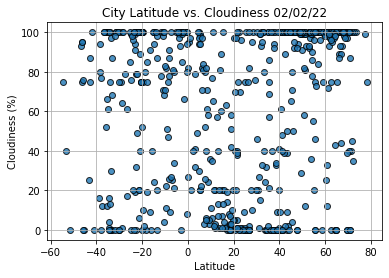

In [20]:
# Build the scatter plot for the latitude vs. max temperature 
plt.scatter(lats,
           cloudiness,
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=0.8,
           label="Cities")
# Incorperate the other graph properties 
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the fig 
plt.savefig("weather_data/Fig3.png")
# Show plot 
plt.show()

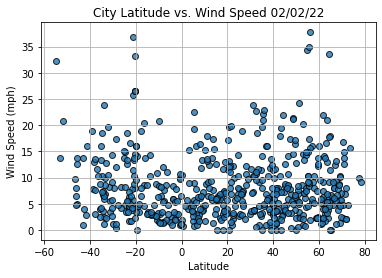

In [22]:
# Build the scatter plot for the latitude vs. max temperature 
plt.scatter(lats,
           wind_speed,
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=0.8,
           label="Cities")
# Incorperate the other graph properties 
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig4.png")
# Show plot 
plt.show()